In [1]:
from modules.Utils.utils import loadFromDB

In [6]:
df_base = loadFromDB('BTC','1d')
df_base['Return'] = df_base.Close.pct_change()
df_base['Bullish_candlestick'] = df_base['Return'].apply(lambda row: 1 if row>=0 else 0)
df_base.dropna(inplace=True)

df_m = loadFromDB('BTC','5m')

In [7]:
df_m['Bullish_candle_ind'] = df_m.apply(lambda row: 1 if row['Close']>row['Open'] else 0, axis=1)
df_m.head()

,Open,High,Low,Close,Volume,Timestamp,Bullish_candle_ind
Date,,,,,,,
2020-06-01 00:00:00,9448.27,9451.74,9421.67,9432.64,270.660953,1590969600,0
2020-06-01 00:05:00,9432.63,9480.82,9431.81,9476.37,220.589443,1590969900,1
2020-06-01 00:10:00,9475.94,9493.11,9474.31,9483.13,216.238406,1590970200,1
2020-06-01 00:15:00,9483.25,9497.91,9479.52,9480.08,202.449505,1590970500,0
2020-06-01 00:20:00,9480.09,9493.57,9475.01,9486.20,83.423524,1590970800,1


In [8]:
Bullish_hourly = df_m['Bullish_candle_ind'].resample('D').agg('sum')[:-1]
df_base = df_base.merge(Bullish_hourly,left_index=True, right_index=True)
df_base

,Open,High,Low,Close,Volume,Timestamp,Return,Bullish_candlestick,Bullish_candle_ind
Date,,,,,,,,,
2020-06-02,10202.71,10228.99,9266.00,9518.04,108970.773151,1591056000,-0.066929,0,151
2020-06-03,9518.02,9690.00,9365.21,9666.24,46252.644939,1591142400,0.015570,1,138
2020-06-04,9666.32,9881.63,9450.00,9789.06,57456.100969,1591228800,0.012706,1,142
2020-06-05,9788.14,9854.75,9581.00,9621.16,47788.050050,1591315200,-0.017152,0,137
2020-06-06,9621.17,9735.00,9531.05,9666.30,32752.950893,1591401600,0.004692,1,146
...,...,...,...,...,...,...,...,...,...
2022-10-19,19327.44,19360.16,19065.97,19123.97,186137.295380,1666137600,-0.010528,0,136
2022-10-20,19123.35,19347.82,18900.00,19041.92,223530.130680,1666224000,-0.004290,0,138
2022-10-21,19041.92,19250.00,18650.00,19164.37,269310.757690,1666310400,0.006431,1,138


<AxesSubplot: >

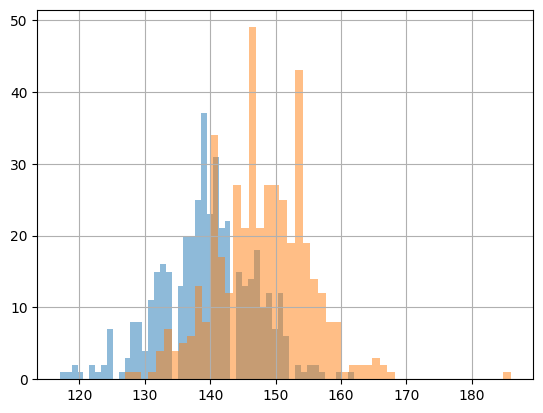

In [10]:
df_base[df_base['Bullish_candlestick']==0]['Bullish_candle_ind'].hist(bins=50, alpha=0.5)
df_base[df_base['Bullish_candlestick']==1].Bullish_candle_ind.hist(bins=50,alpha=0.5)